In [17]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input

import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape

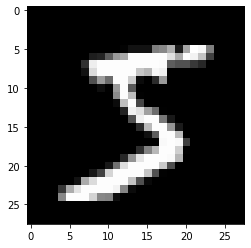

In [19]:
plt.imshow(X_train[0], cmap="gray")

In [20]:
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

# Model

In [27]:
Input_layer = Input(shape=(28,28,1))

# Encoder
x = Conv2D(16,(3,3), activation="relu", padding="same")(Input_layer)
x = MaxPool2D(pool_size=(2,2),padding="same")(x)
x = Conv2D(8,(3,3), activation="relu", padding="same")(x)
x = MaxPool2D(pool_size=(2,2),padding="same")(x)
x = Conv2D(8,(3,3), activation="relu", padding="same")(x)
encoded = MaxPool2D(pool_size=(2,2),padding="same")(x)


# Decoder
x = Conv2D(8, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation="relu")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3), activation="relu", padding="same")(x)

In [28]:
autoencoder = Model(Input_layer, decoded)

In [29]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 8)           584 

In [32]:
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

In [34]:
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=128, validation_data=(X_test,X_test))

Epoch 1/20
469/469 [==============================] - 90s 191ms/step - loss: 0.1971 - val_loss: 0.1801
Epoch 2/20
469/469 [==============================] - 84s 180ms/step - loss: 0.1749 - val_loss: 0.1654
Epoch 3/20
469/469 [==============================] - 84s 180ms/step - loss: 0.1781 - val_loss: 0.1722
Epoch 4/20
469/469 [==============================] - 88s 187ms/step - loss: 0.1822 - val_loss: 0.1734
Epoch 5/20
469/469 [==============================] - 85s 180ms/step - loss: 0.1630 - val_loss: 0.1546
Epoch 6/20
469/469 [==============================] - 87s 186ms/step - loss: 0.3311 - val_loss: 0.2189
Epoch 7/20
469/469 [==============================] - 84s 180ms/step - loss: 0.2029 - val_loss: 0.1901
Epoch 8/20
469/469 [==============================] - 90s 191ms/step - loss: 0.2101 - val_loss: 0.1927
Epoch 9/20
469/469 [==============================] - 89s 190ms/step - loss: 0.1909 - val_loss: 0.1806
Epoch 10/20
469/469 [==============================] - 90s 192ms/step - l

In [36]:
encoder = Model(Input_layer, encoded)

decoder_layer = Input(shape = (4,4,8))

decoder = autoencoder.layers[7](decoder_layer)

for layer in autoencoder.layers[8:]:
  decoder = layer(decoder)

decoder = Model(decoder_layer, decoder)
decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d_6 (UpSampling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_7 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 16)        1168

In [37]:
encoded_images = encoder.predict(X_test, verbose=1)

313/313 [==============================] - 4s 12ms/step


In [41]:
decoded_images = decoder.predict(encoded_images, verbose=1)
decoded_images.shape

313/313 [==============================] - 7s 23ms/step


(10000, 28, 28, 1)

In [42]:
decoded_images = decoded_images.reshape(decoded_images.shape[0], 28,28)
decoded_images.shape

(10000, 28, 28)

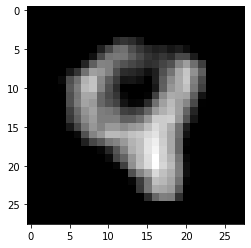

In [44]:
plt.imshow(decoded_images[4], cmap="gray")

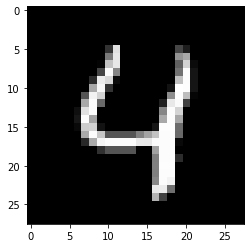

In [45]:
X_test = X_test.reshape(X_test.shape[0],28,28)
plt.imshow(X_test[4], cmap="gray")